# Step 2: Analyze and Visualize Prediction Results

**Purpose:** This notebook loads the consolidated `03_prediction_results_all.csv` file and performs a comprehensive analysis of the model's performance. It combines the functionalities of the previous `02_result_visualizaion.ipynb` and `03_EST_Hardly.ipynb`.

**Key Features:**
- Loads a single CSV file.
- Calculates overall and per-dataset accuracy.
- Generates confusion matrices to analyze errors.
- Considers `sadness` classified as `sad` as a correct prediction.
- Visualizes results using `matplotlib` and `seaborn`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

### Load Combined Prediction Data

In [2]:
csv_path = '02_prediction_results_all.csv'
try:
    df = pd.read_csv(csv_path)
    print(f"Successfully loaded {csv_path}. Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: {csv_path} not found. Please run the prediction notebook (02_predict_emotions_with_HardlyHumans.ipynb) first.")

Successfully loaded 02_prediction_results_all.csv. Shape: (8396, 4)


,image_path,true_label,predicted_label,dataset
0,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,surprise,train
1,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
2,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
3,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train
4,/workspace/AI/FER/Data/EST_data/img_train/ange...,anger,neutral,train


### Define Correctness
The model's native label for sadness is `sad`. Our dataset's folder is `sadness`. We consider a prediction correct if `true_label` is `sadness` and `predicted_label` is `sad`. 

In [3]:
if 'df' in locals():
    # Define a 'correct' prediction
    # A prediction is correct if labels match OR if true_label is 'sadness' and predicted_label is 'sad'
    df['is_correct'] = (df['true_label'] == df['predicted_label']) | ((df['true_label'] == 'sadness') & (df['predicted_label'] == 'sad'))

### Overall Performance Analysis

In [4]:
if 'df' in locals():
    overall_accuracy = df['is_correct'].mean() * 100
    print(f"Overall Model Accuracy: {overall_accuracy:.2f}%")
    
    # Accuracy per dataset
    accuracy_by_dataset = df.groupby('dataset')['is_correct'].mean().reset_index()
    accuracy_by_dataset.columns = ['Dataset', 'Accuracy']
    accuracy_by_dataset['Accuracy'] = accuracy_by_dataset['Accuracy'] * 100
    
    print("Accuracy by Dataset:")
    display(accuracy_by_dataset)

Overall Model Accuracy: 16.19%
Accuracy by Dataset:


,Dataset,Accuracy
0,test,15.916667
1,train,16.127418
2,val,16.750000


### Confusion Matrix for Incorrect Predictions
This helps us see what the model predicts when it gets the answer wrong.

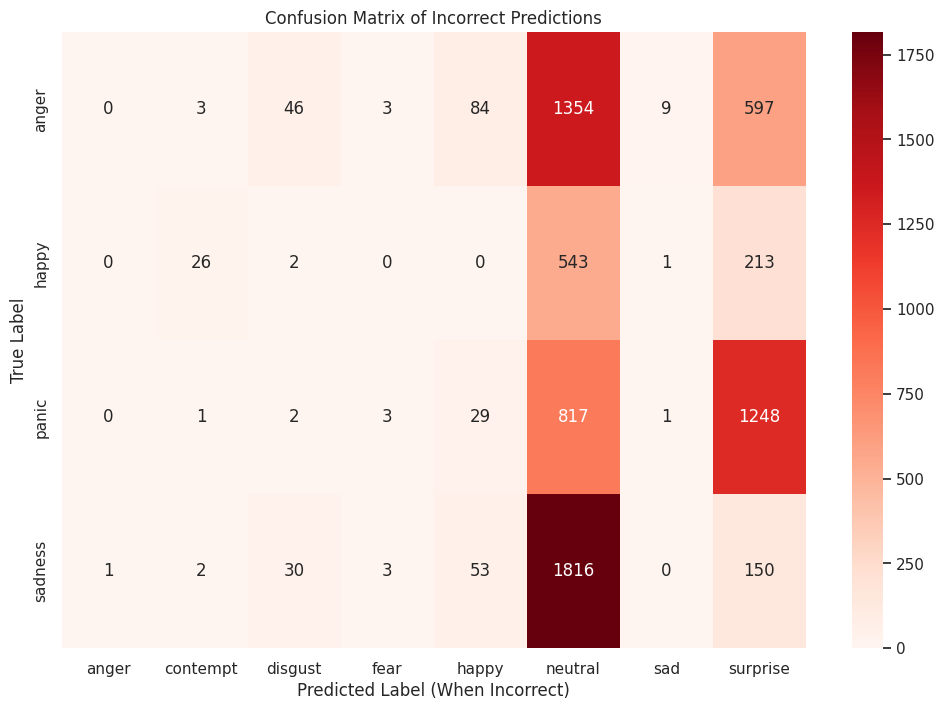

In [5]:
if 'df' in locals():
    wrong_df = df[~df['is_correct']]
    
    # Create a confusion matrix (crosstab) for incorrect predictions
    error_crosstab = pd.crosstab(wrong_df['true_label'], wrong_df['predicted_label'])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(error_crosstab, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix of Incorrect Predictions')
    plt.xlabel('Predicted Label (When Incorrect)')
    plt.ylabel('True Label')
    plt.show()

### Error Analysis by True Label (Percentage)
For each true emotion, what were the most common incorrect predictions?

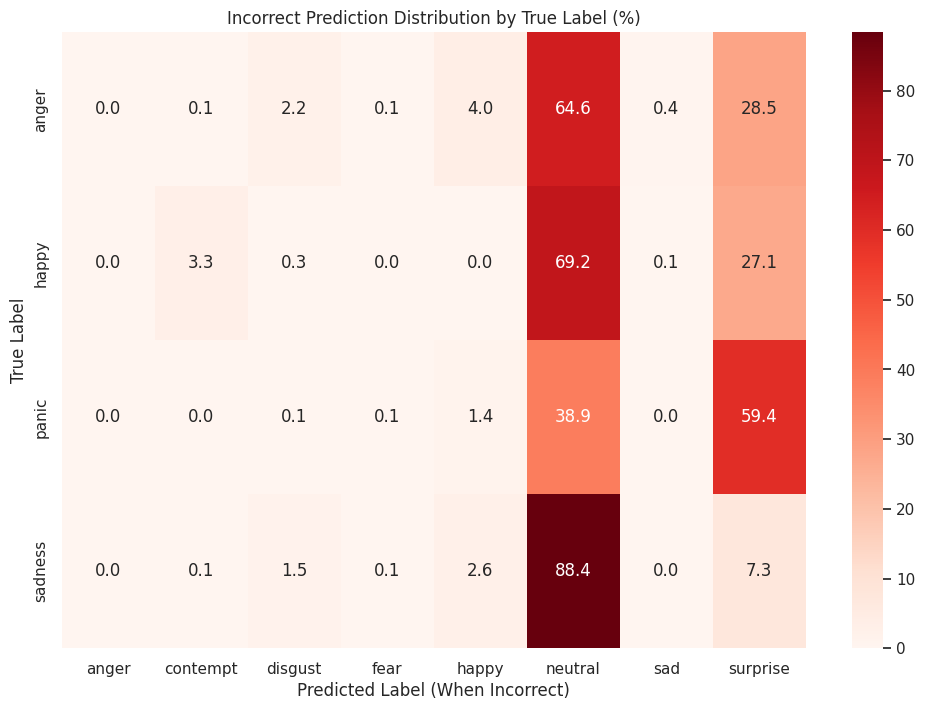

In [7]:
if 'df' in locals() and not error_crosstab.empty:
    # Convert counts to percentages
    error_percent = error_crosstab.div(error_crosstab.sum(axis=1), axis=0) * 100
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(error_percent, annot=True, fmt='.1f', cmap='Reds')
    plt.title('Incorrect Prediction Distribution by True Label (%)')
    plt.xlabel('Predicted Label (When Incorrect)')
    plt.ylabel('True Label')
    plt.show()